In [1]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("C:\\Users\\HP\\market_basket.csv",header = None)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(7501, 20)

In [9]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [11]:
# Data Processing
transactions = []
for i in range(0,7501):
    transactions.append([str(df.values[i,j]) for j in range(0,20)])
    
# Training the Dataset
from apyori import apriori
rules = apriori(transactions, min_support = 0.03, min_confidence = 0.02 ,min_left = 3, min_length =2)
# (3items *  7 days in week )


a = list(rules)
result = [list(a[i][0]) for i in range(0, len(a))]

In [12]:
a

[RelationRecord(items=frozenset({'avocado'}), support=0.03332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'avocado'}), confidence=0.03332888948140248, lift=1.0)]),
 RelationRecord(items=frozenset({'brownies'}), support=0.03372883615517931, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'brownies'}), confidence=0.03372883615517931, lift=1.0)]),
 RelationRecord(items=frozenset({'burgers'}), support=0.0871883748833489, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'burgers'}), confidence=0.0871883748833489, lift=1.0)]),
 RelationRecord(items=frozenset({'butter'}), support=0.030129316091187842, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'butter'}), confidence=0.030129316091187842, lift=1.0)]),
 RelationRecord(items=frozenset({'cake'}), support=0.08105585921877083, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_a

In [13]:
result

[['avocado'],
 ['brownies'],
 ['burgers'],
 ['butter'],
 ['cake'],
 ['champagne'],
 ['chicken'],
 ['chocolate'],
 ['cookies'],
 ['cooking oil'],
 ['cottage cheese'],
 ['eggs'],
 ['escalope'],
 ['french fries'],
 ['fresh bread'],
 ['frozen smoothie'],
 ['frozen vegetables'],
 ['grated cheese'],
 ['green tea'],
 ['ground beef'],
 ['herb & pepper'],
 ['honey'],
 ['hot dogs'],
 ['low fat yogurt'],
 ['milk'],
 ['mineral water'],
 ['nan'],
 ['olive oil'],
 ['pancakes'],
 ['salmon'],
 ['shrimp'],
 ['soup'],
 ['spaghetti'],
 ['tomato juice'],
 ['tomatoes'],
 ['turkey'],
 ['whole wheat rice'],
 ['nan', 'avocado'],
 ['nan', 'brownies'],
 ['nan', 'burgers'],
 ['nan', 'butter'],
 ['cake', 'nan'],
 ['nan', 'champagne'],
 ['nan', 'chicken'],
 ['chocolate', 'eggs'],
 ['chocolate', 'french fries'],
 ['chocolate', 'milk'],
 ['chocolate', 'mineral water'],
 ['chocolate', 'nan'],
 ['chocolate', 'spaghetti'],
 ['nan', 'cookies'],
 ['nan', 'cooking oil'],
 ['nan', 'cottage cheese'],
 ['eggs', 'french fries

# CCA

In [14]:
df = pd.read_csv("C:\\Users\\HP\\dsjob.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [15]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.860968
relevent_experience        0.000000
enrolled_university        1.456083
education_level            2.442461
major_discipline          14.654767
experience                 0.234852
company_size              29.215594
company_type              29.779239
last_new_job               1.878816
training_hours             0.000000
dtype: float64

In [17]:
cols = [var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean() > 0]
cols

['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [18]:
df[cols].head()

,enrolled_university,education_level,experience,last_new_job
0,Full time course,Graduate,9,1
1,no_enrollment,Graduate,5,1
2,no_enrollment,High School,<1,never
3,no_enrollment,Masters,11,1
4,no_enrollment,Graduate,>20,>4


In [20]:
df[cols].tail()

,enrolled_university,education_level,experience,last_new_job
2124,no_enrollment,Graduate,16,4
2125,no_enrollment,Masters,18,2
2126,no_enrollment,Primary School,3,never
2127,Full time course,High School,7,1
2128,no_enrollment,Masters,15,2


In [21]:
df['education_level'].value_counts()

Graduate          1269
Masters            496
High School        222
Phd                 54
Primary School      36
Name: education_level, dtype: int64

In [22]:
len(df[cols].dropna()) / len(df)

0.9478628464067638

In [23]:
new_df = df[cols].dropna()
df.shape

(2129, 13)

In [24]:
new_df.shape

(2018, 4)

In [25]:
import matplotlib.pyplot as plt

<Axes: >

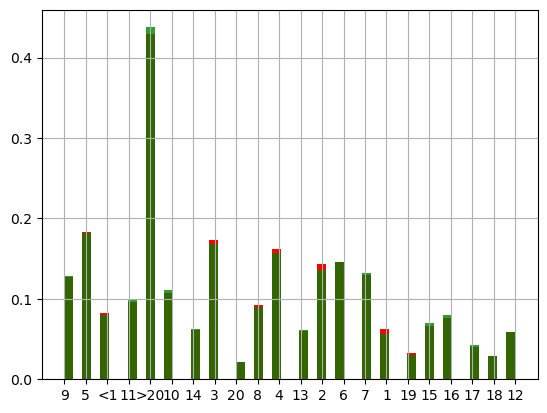

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Data
df['experience'].hist(bins = 50, ax = ax, density = True, color = 'red')

# Updated Data
new_df['experience'].hist(bins = 50, ax = ax, color = 'green', density = True, alpha = 0.8)

In [29]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\covid_toy.csv")
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [30]:
df.isnull().mean()*100

age           0.0
gender        0.0
fever        10.0
cough         0.0
city          0.0
has_covid     0.0
dtype: float64

In [40]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')


fever_column = df[['fever']]

imputer = SimpleImputer(strategy='most_frequent')


fever_column_imputed = imputer.fit_transform(fever_column)

df['fever'] = fever_column_imputed


In [41]:
df.isnull().mean()*100

age          0.0
gender       0.0
fever        0.0
cough        0.0
city         0.0
has_covid    0.0
dtype: float64

In [42]:
# cols = [var for var in df.columns if df[var].isnull().mean()<0.5 and df[var].isnull().mean() > 0]
# cols

In [43]:
# df[cols].head()